# Sales Analysis

#### Import necessary libraries

In [25]:
import pandas as pd
import os

#### Merge data from each month into one CSV

In [26]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files: 
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [27]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Cleaning up the data

Drop rows of NaN:

In [28]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


##### Get rid of text in order date column:

In [29]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

##### Convert columns to the correct type:

In [30]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


In [31]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Augment data with additional columns

#### Add month column:

In [32]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32') 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Add a sales column:

In [33]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Add a "City" column:

In [34]:
# Let's use .apply() 
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


## Data Exploration

#### Question 1: What was the best month for sales? How much was earned that month?

In [35]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [36]:
results = all_data.groupby('Month')[['Quantity Ordered', 'Price Each', 'Sales']].sum()

results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


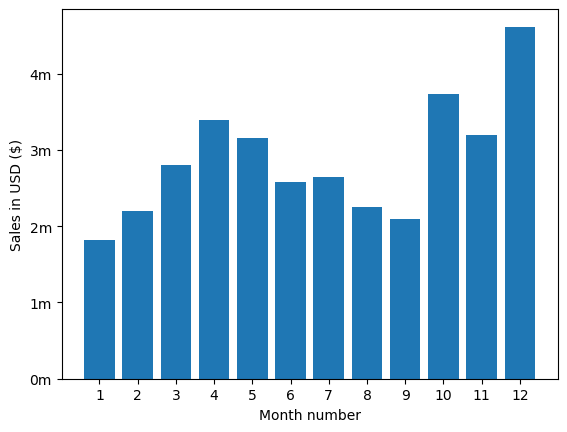

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

def millions(x, pos):
    return f'{x/1_000_000:.0f}m'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(millions))
plt.show()


### Question 2: What city had the highest number of sales? 

In [38]:
results = all_data.groupby('City')[['Quantity Ordered', 'Price Each']].sum()

results

,Quantity Ordered,Price Each
City,,
Atlanta (GA),16602,2779908.20
Austin (TX),11153,1809873.61
Boston (MA),22528,3637409.77
Dallas (TX),16730,2752627.82
Los Angeles (CA),33289,5421435.23
New York City (NY),27932,4635370.83
Portland (ME),2750,447189.25
Portland (OR),11303,1860558.22
San Francisco (CA),50239,8211461.74


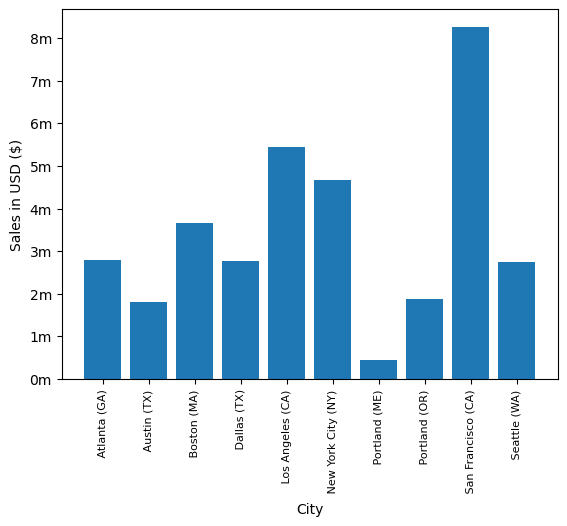

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

sales_by_city = all_data.groupby('City')['Sales'].sum()

keys = sales_by_city.index

plt.bar(keys, sales_by_city.values, align='center')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(rotation='vertical', size=8)

# Define a custom formatter to display ticks as 1m, 2m, etc.
def millions(x, pos):
    return f'{x/1_000_000:.0f}m'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(millions))
plt.show()


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [40]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

/var/folders/1z/j73pt9wx3dj89j3b5hd6qyhh0000gn/T/ipykernel_1217/3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [41]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


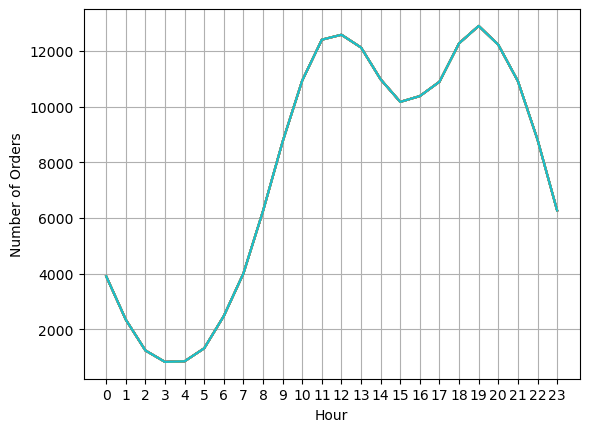

In [42]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# My recommendation is around 11 AM or 7 PM

#### Question 4: What products are most often sold together?

In [43]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df.head()

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(100)

/var/folders/1z/j73pt9wx3dj89j3b5hd6qyhh0000gn/T/ipykernel_1217/306627633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."
...,...,...
2297,297847,"iPhone, Lightning Charging Cable"
2345,297894,"USB-C Charging Cable, AA Batteries (4-pack)"
2347,297895,"USB-C Charging Cable, 27in FHD Monitor"
2398,297945,"Vareebadd Phone, USB-C Charging Cable, Bose So..."


In [44]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


#### Question 5: What product sold the most? Why do you think it sold the most?

In [21]:
# Group by product and sum the quantities
product_sales = all_data.groupby('Product')['Quantity Ordered'].sum()

# Sort by most sold products
print(product_sales.sort_values(ascending=False).head(10))


Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64


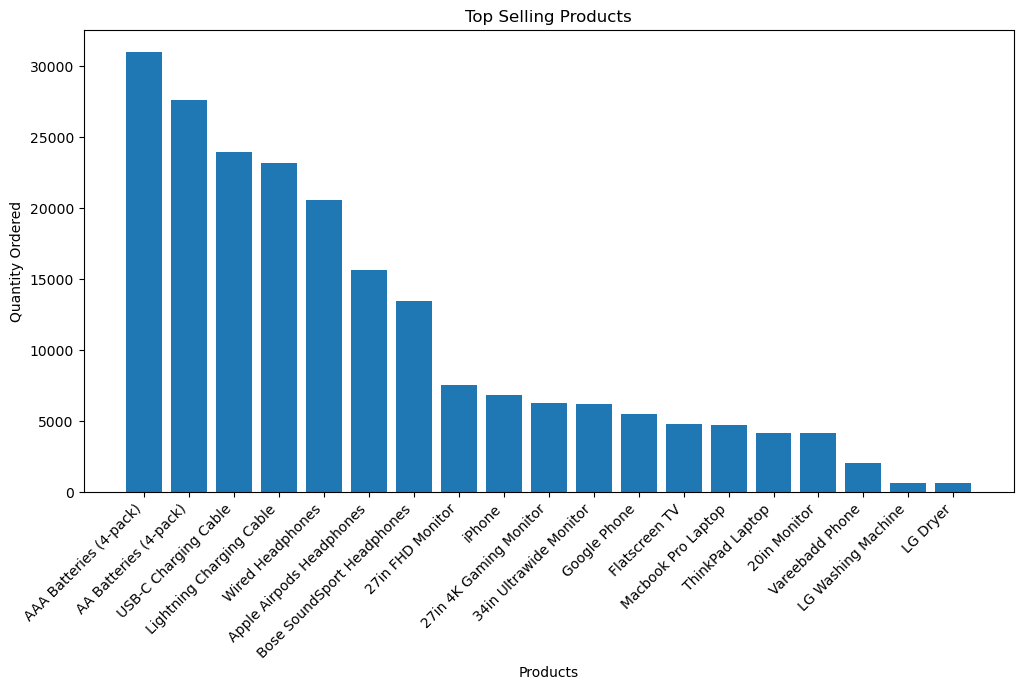

In [45]:
product_sales = all_data.groupby('Product')['Quantity Ordered'].sum()

# Sort products by sales
product_sales = product_sales.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(product_sales.index, product_sales.values)

# Add labels and title
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.title('Top Selling Products')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

##### Let's get the average prices of each product:

In [46]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

prices = all_data.groupby('Product')['Price Each'].mean()

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


##### Now, let's plot an overlay of average prices on our existing bar chart:

/var/folders/1z/j73pt9wx3dj89j3b5hd6qyhh0000gn/T/ipykernel_1217/3794726957.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_sales.index, rotation=45, ha='right')


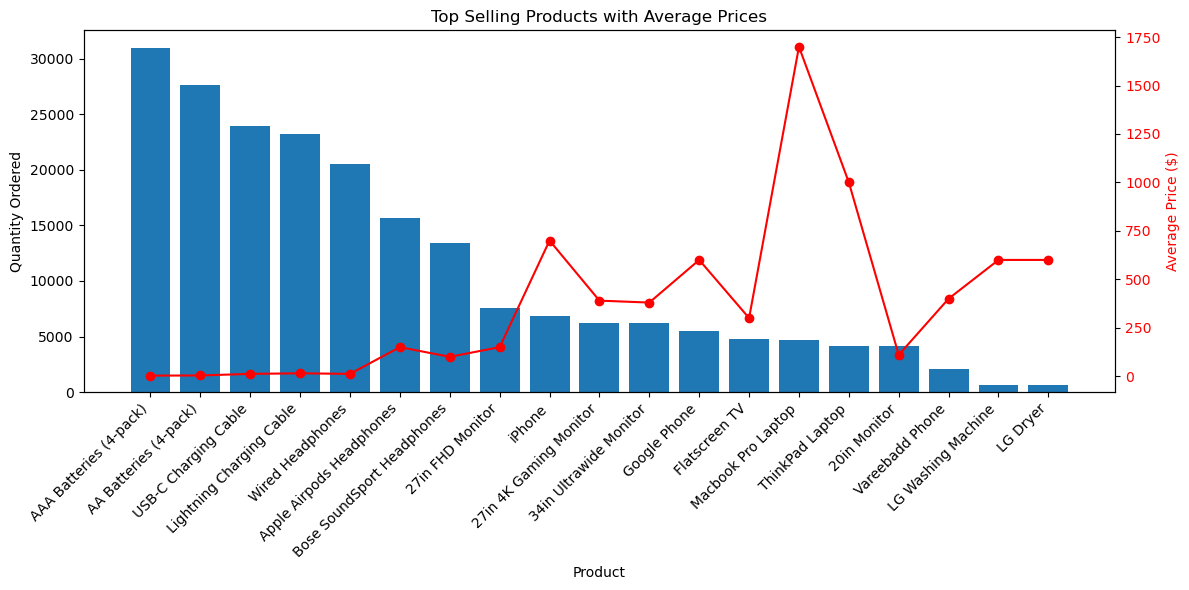

In [47]:
# Grouping data
product_sales = all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
prices = all_data.groupby('Product')['Price Each'].mean()

# Create a new figure with appropriate size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the bar chart on ax1 for Quantity Ordered
ax1.bar(product_sales.index, product_sales.values, label='Quantity Ordered')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(product_sales.index, rotation=45, ha='right')

# Create a twin axis sharing the same x-axis for the average price line chart
ax2 = ax1.twinx()
# Ensure the prices are in the same order as product_sales
ax2.plot(product_sales.index, prices.loc[product_sales.index], color='red', marker='o', label='Average Price')
ax2.set_ylabel('Average Price ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and adjust layout
plt.title('Top Selling Products with Average Prices')
fig.tight_layout()

plt.show()


# Write about your conclusions on each data you found.